In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11.ipynb")

# E7: Lab Assignment 11

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## About this Lab
The objective of this assignment is to familiarize you with numerical methods for ordinary differential equations.

## Autograder
You will be provided with some test cases (i.e., sample input data) and associated answers (i.e., expected outputs) that you can use to help check your code. The provided test cases are not exhaustive, and it is your responsibility to ensure that your code works in general, not just for a few supplied test cases. We may use additional hidden test cases in grading your lab assignments.

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

## Answer cells
Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Your answers must be in the cells marked `# ANSWER CELL`, including your final calculation/code. However, do not perform scratchwork in `# ANSWER CELL`. Add a new cell to perform your scratchwork. Your scratchwork will not be graded and does not need to be included in your submission unless otherwise noted.

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question| Points
--- | --
1 | 9.0
2 | 11.0
3 | 5.0
Total | 25.0

**Run the cell below**, to import the required modules.

In [502]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp
np.seterr(all='ignore');
import time
!pip install -q IPythonDisplayFireworks

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Logistic Equation

The logistic equation is a simple differential equation model which can be used to relate the change in population $\dfrac{dP}{dt}$ to the current population, $P$.  The logistic equation models bounded growth as opposed to earlier exponential growth models which fail to take into account constraints on the maximum population. These constraints arise from the fact that large populations will necessarily compete for resources (e.g. food, living space, etc.), while small populations are not generally constrained by these factors and can grow exponentially. The logistic equation reads

$$\dfrac{dP}{dt} = rP\left(1−\frac{P}{K}\right)$$
where
* $r$ is the growth rate in the absence of limited resources; i.e. how quickly the population would grow if infinite resources were available,
* $K$ is the carrying capacity, or the maximum population the ecosystem is able to sustain indefinitely.

The logistic equation can be used in a variety of other contexts, including machine learning, cancer treatment, economics and language adoption among others. While the interpretation of the parameters may change, the potential applications are all characterized by an exponential growth followed by a gradual saturation which the logistic equation is able to model. 

### Question 1.0 

Write a function `my_logistic_eq(t,P,r,K)` that returns $dP/dt$ based on the logistic equation above. You may assume that the arguments `t`, `P`, `r`, and `K` are all scalars, and represent the time, current population, growth rate and carrying capacity, respectively, as given in the above equation. 

We will later use the built-in `scipy.integrate.solve_ivp` function to integrate this ODE. This format allows `my_logistic_eq` to be used as an input argument to `solve_ivp` even though `t` is not part of the differential equation. ODEs which are not dependent on the time variable $t$ are known as *autonomous*.
 
Once you are done, try out your new `my_logistic_eq(t,P,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_0`.
 
```PYTHON
Example: 
    
>>> my_logistic_eq(0,10,1.1,15)
3.666666666666667
```

In [503]:
# ANSWER CELL
# BEGIN SOLUTION
my_logistic_eq = lambda t,P,r,K: r*P*(1-P/K) 
# END SOLUTION

In [504]:
# TEST YOUR FUNCTION HERE
q1_0 = my_logistic_eq(0,10,1.1,15) # SOLUTION
q1_0 

3.666666666666667

In [ ]:
grader.check("q1.0")

### Question 1.1: Forward (Explicit) Euler Method

Write a function `my_logistic_euler(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equation. 

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the Forward Euler method. The function should return two `numpy.array` objects. First, the discrete time grid and, second, the numerical solution for $P(t)$ evaluated on the time grid. Both arrays should have shape `(n+1,)`.

Once you are done, try out your new `my_logistic_euler(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_1`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_logistic_euler(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  19.595     ,  37.44693167,  68.18685557,
        113.57587097, 163.14513439, 193.50922901, 199.85215066,
        200.0013681 , 199.99998631, 200.00000014]))
```

In [507]:
# ANSWER CELL
# BEGIN SOLUTION
def my_logistic_euler(t_span,n,P0,r,K):
    
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    Ps = np.zeros((n+1,))
    Ps[0] = P0
    for i in range(1,n+1):
        Ps[i] = Ps[i-1] + dt*my_logistic_eq(t0,Ps[i-1],r,K)
    return ts,Ps
# END SOLUTION

In [508]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_1 = my_logistic_euler(t_span,n,P0,r,K) # SOLUTION
q1_1 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  19.595     ,  37.44693167,  68.18685557,
        113.57587097, 163.14513439, 193.50922901, 199.85215066,
        200.0013681 , 199.99998631, 200.00000014]))

In [ ]:
grader.check("q1.1")

### Question 1.2: Explicit Midpoint Method

Write a function `my_logistic_midpoint(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equation. 

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the explicit midpoint method. The function should return two `numpy.array` objects. First, the discrete time grid and, second, the numerical solution for $P(t)$ evaluated on the time grid. Both arrays should have shape `(n+1,)`.

Once you are done, try out your new `my_logistic_midpoint(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_2`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_logistic_midpoint(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  23.83969667,  52.63667777,  99.24011848,
        146.71166129, 174.91141658, 188.06871901, 194.19856402,
        197.14067754, 198.58063224, 199.29285385]))
```

In [511]:
# ANSWER CELL
# BEGIN SOLUTION
def my_logistic_midpoint(t_span,n,P0,r,K):
    
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    Ps = np.zeros((n+1,))
    Ps[0] = P0
    for i in range(1,n+1):
        k1 = (dt/2)*my_logistic_eq(t0,Ps[i-1],r,K)
        Ps[i] = Ps[i-1] + dt*my_logistic_eq(t0,Ps[i-1]+k1,r,K)
    return ts,Ps
# END SOLUTION

In [512]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_2 = my_logistic_midpoint(t_span,n,P0,r,K) # SOLUTION
q1_2 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  23.83969667,  52.63667777,  99.24011848,
        146.71166129, 174.91141658, 188.06871901, 194.19856402,
        197.14067754, 198.58063224, 199.29285385]))

In [ ]:
grader.check("q1.2")

### Question 1.3: Heun's Method

Write a function `my_logistic_heun(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equation. 

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using Heun's method. The function should return two `numpy.array` objects. First, the discrete time grid and, second, the numerical solution for $P(t)$ evaluated on the time grid. Both arrays should have shape `(n+1,)`.

Once you are done, try out your new `my_logistic_heun(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_3`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_logistic_heun(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  23.72346584,  51.85066975,  96.27574153,
        141.23262852, 169.98341755, 184.96735326, 192.48615188,
        196.24401448, 198.12217279, 199.06108154]))
```

In [515]:
# ANSWER CELL
# BEGIN SOLUTION
def my_logistic_heun(t_span,n,P0,r,K):
    
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    Ps = np.zeros((n+1,))
    Ps[0] = P0
    for i in range(1,n+1):
        k1 = dt*my_logistic_eq(t0,Ps[i-1],r,K)
        Ps[i] = Ps[i-1] + (dt/2)*(my_logistic_eq(t0,Ps[i-1],r,K) + my_logistic_eq(t0,Ps[i-1]+k1,r,K))
    return ts,Ps
# END SOLUTION

In [516]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_3 = my_logistic_heun(t_span,n,P0,r,K) # SOLUTION
q1_3 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  23.72346584,  51.85066975,  96.27574153,
        141.23262852, 169.98341755, 184.96735326, 192.48615188,
        196.24401448, 198.12217279, 199.06108154]))

In [ ]:
grader.check("q1.3")

### Question 1.4

Write a function `my_logistic_ivp(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equations. 

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the built-in `scipy.integrate.solve_ivp` function. Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). You will have to pass the function to be integrated, the time span and the initial condition to `solve_ivp`. For this problem, you will also have to specify the `t_eval` argument which tells the solver the points at which the solution is desired. If left blank, `solve_ivp` will choose these points for you. 

Your `my_logistic_ivp` function should return two `numpy.array` objects. First, the discrete time grid and, second, the numerical solution for $P(t)$ evaluated on the time grid.  Both arrays should have shape `(n+1,)`.

*Hint: The main arguments you want to pass are: `scipy.integrate.solve_ivp(fun=..., t_span=..., y0=..., t_eval=..., args=(...))`*

*Note that the initial value, `y0`, should be array like, even if it is a single scalar value. In addition, `args` should be a tuple that includes additional arguments to pass to the user-defined function, `fun`, besides the independent variable and the unknown function we're trying to solve for.*

Once you are done, try out your new `my_logistic_ivp(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_4`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_logistic_ivp(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  25.25417705,  56.82447686, 104.36572878,
        149.93249826, 178.34074735, 191.54722911, 196.85380604,
        198.82277579, 199.58873589, 199.8247388 ]))
```

In [519]:
# ANSWER CELL
# BEGIN SOLUTION
def my_logistic_ivp(t_span,n,P0,r,K):
    sol = solve_ivp(my_logistic_eq, t_span, [P0], args=(r,K), t_eval=np.linspace(t_span[0],t_span[1],n+1))
    return sol.t, sol.y[0]
# END SOLUTION

In [520]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_4 = my_logistic_ivp(t_span,n,P0,r,K) # SOLUTION
q1_4

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  25.25417705,  56.82447686, 104.36572878,
        149.93249826, 178.34074735, 191.54722911, 196.85380604,
        198.82277579, 199.58873589, 199.8247388 ]))

In [ ]:
grader.check("q1.4")

### Question 1.5

The logistic equation has an analytic solution given by

$$P(t)= \frac{KP_0e^{rt}}{K+P_0(e^{rt}−1)}$$

where $P_0$ is the initial population. This curve belongs to the family of *logistic functions*, hence the name of the equation. 

Write a function `my_logistic_plot(t_span,n,P0,r,K)` which returns a `matplotlib.pyplot` figure of the exact solution and the four numerical solutions. The function inputs are the same as in the previous parts.

The function should create the figure as follows:
* Line plot (1) time vs. population as computed by `my_logistic_euler` given the input parameters
* Line plot (2) time vs. population as computed by `my_logistic_midpoint` given the input parameters
* Line plot (3) time vs. population as computed by `my_logistic_heun` given the input parameters
* Line plot (4) time vs. population as computed by `my_logistic_ivp` given the input parameters
* Line plot (5) time vs. population as given by the exact solution on an equally spaced time grid of 10,001 points spanning `t_span`.
* A legend with labels 'Forward Euler', 'Midpoint', 'Heun', 'solve_ivp' and 'Exact' for line plots 1-5, respectively
* X axis label which reads 'Time, year'
* Y axis label which reads 'Population'
* Title label which reads 'n = {n}', where {n} is replaced with `n`
* X-axis limits equal to `t_span`
* Y-axis limits equal to `[0,K]`

Once you are done, test your function for the two examples below. Assign the result to `q1_5`. Your output figures should look like Figures 1 and 2 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

 
```PYTHON
Examples: 
>>> t_span = [0,10]
>>> P0 = 10
>>> r = 1.01
>>> K = 200
>>> n = 10
>>> my_logistic_plot(t_span,n,P0,r,K)
```
<img src="resources/lab11_q1_5_1.png" style="width:600px;"/>
<figcaption style="text-align:center"> Figure 1. Question 1.5, Example 1</figcaption>   

```PYTHON
>>> n = 1000
>>> my_logistic_plot(t_span,n,P0,r,K)
```
<img src="resources/lab11_q1_5_2.png" style="width:600px;"/>
<figcaption style="text-align:center"> Figure 2. Question 1.5, Example 2 </figcaption>  

In [523]:
# ANSWER CELL
# BEGIN SOLUTION
def my_logistic_plot(t_span,n,P0,r,K):
    # Forward Euler
    ts_euler, Ps_euler = my_logistic_euler(t_span,n,P0,r,K)
    # Midpoint
    ts_mid, Ps_mid = my_logistic_midpoint(t_span,n,P0,r,K)
    # Heun
    ts_heun, Ps_heun = my_logistic_heun(t_span,n,P0,r,K)
    # solve_ivp
    ts_ivp, Ps_ivp = my_logistic_ivp(t_span,n,P0,r,K)
    # Exact solution
    ts_exact = np.linspace(t_span[0],t_span[1],10001)
    Ps_exact = K*P0*np.exp(r*ts_exact)/(K+P0*(np.exp(r*ts_exact)-1))
    # Create figure
    fig = plt.figure(figsize = (8, 6))
    # Plot solutions
    plt.plot(ts_euler, Ps_euler, label = 'Forward Euler')
    plt.plot(ts_mid, Ps_mid, label = 'Midpoint')
    plt.plot(ts_heun, Ps_heun, label = 'Heun')
    plt.plot(ts_ivp, Ps_ivp, label = 'solve_ivp')
    plt.plot(ts_exact, Ps_exact, label = 'Exact')
    # Labels
    plt.xlabel('Time, year')
    plt.ylabel('Population')
    # Title
    plt.title(f'n = {n}')
    # Limits
    plt.xlim(t_span)
    plt.ylim([0,K])
    # Legend
    plt.legend()
    # Grid
    plt.grid()
    return fig
# END SOLUTION

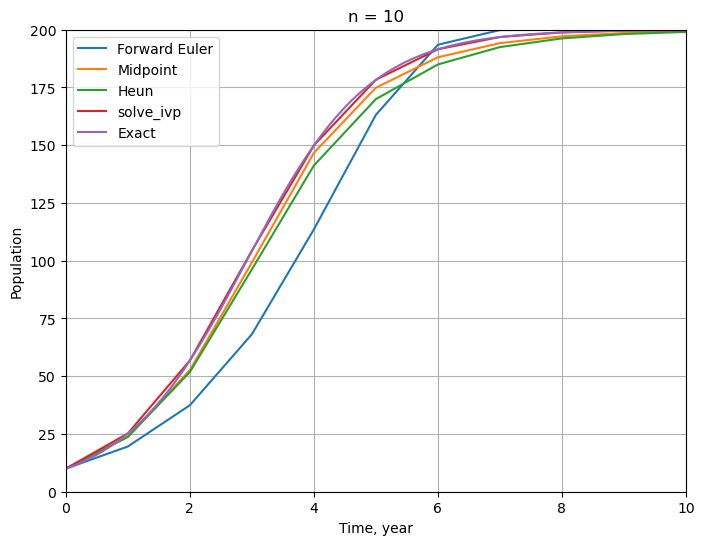

In [524]:
# TEST YOUR FUNCTION HERE
t_span = [0,10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_5 = my_logistic_plot(t_span,n,P0,r,K) # SOLUTION

In [ ]:
grader.check("q1.5")

## Question 2: Damped Harmonic Oscillator

Consider the model of a mass-spring-damper (MSD) system in one dimension shown in Figure 3. In this figure, $m$ denotes the mass of the block, $c$ is the damping coefficient, and $k$ is the spring stiffness. 

<img src="resources/msd.png" style="width:200px;"/>
<figcaption style="text-align:center"> Figure 3. Mass-spring-damper system. </figcaption>   

A damper is a mechanism which dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications such as shock absorbers and structural systems. The relationship between the acceleration $\ddot{x}$, velocity $\dot{x}$, and displacement $x$ can be expressed by the following mass-spring-damper (MSD) differential equation

$$ m\ddot{x} + c\dot{x} +  kx = 0$$

which can be rewritten as 

$$\ddot{x}  = \dfrac{-(c\dot{x} +  kx)}{m}$$

### Question 2.0: Reduction of Order

Let the state of the system be denoted by the vector 

$$ S = \begin{bmatrix} x \\ v \end{bmatrix} = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}= \begin{bmatrix} S_1 \\ S_2 \end{bmatrix}$$

where $x$ is the displacement of the mass from its resting configuration and $v$  is its velocity, which is simply the derivative of the displacement. We wish to rewrite the MSD equation as a first-order differential equation in terms of the state, $S$. We can take the first derivative of $S$, which results in the following

$$\dot{S}= \begin{bmatrix} \dot{x} \\ \dot{v} \end{bmatrix}= \begin{bmatrix} \dot{x} \\ \ddot{x} \end{bmatrix}$$

Based on the MSD differential equation shown above

$$\ddot{x}  = \dfrac{-(c\dot{x} +  kx)}{m} = \dfrac{-(cS_2 +  kS_1)}{m} $$

Hence, we can rewrite $\dot{S}$ as follows

$$\dot{S}= \begin{bmatrix} \dot{x} \\ \ddot{x} \end{bmatrix}= \begin{bmatrix} S_2 \\ \dfrac{-(cS_2 +  kS_1)}{m} \end{bmatrix}$$

Our goal is to transform the above system to matrix form, and find the matrix $A$ such that

$$\dot{S}= \begin{bmatrix} S_2 \\ \dfrac{-(cS_2 +  kS_1)}{m} \end{bmatrix} = A \begin{bmatrix} S_1 \\ S_2 \end{bmatrix} =  A \cdot S$$

where $A$ is some linear operator (matrix). Note that $A$ should be independent of $S$ and $t$. Although, this might not look simpler, the matrix $A$ will be extremely useful for solving the MSD equation using several numerical methods.

Write a function `my_msd(m,c,k)` where `m`, `c`, and `k` are the mass, damping, and stiffness coefficients of the MSD equation, respectively. Your function should return the matrix $A$ which maps $S$ to $\dot{S}$ as a `numpy.array` of shape `(2,2)`. Note that $A$ sould be a `numpy.array`.

*Hint: You will have to derive the values of matrix $A$ by hand and then write the function below that returns it. Solve for $a_{11}, a_{12}, a_{21}, a_{22}$ that satisfy the matrix multiplication shown below*

$$\dot{S}=  A \cdot S = \begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix} \begin{bmatrix} S_1 \\ S_2 \end{bmatrix} = \begin{bmatrix} S_2 \\ \dfrac{-(cS_2 +  kS_1)}{m} \end{bmatrix}$$

Once you are done, try out your new `my_msd(m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q2_0`.
 
```PYTHON
Example: 
    
>>> my_msd(10, 1, 100)

array([[  0. ,   1. ],
       [-10. ,  -0.1]])
```

In [528]:
# ANSWER CELL
# BEGIN SOLUTION
my_msd = lambda m,c,k: np.array([[0, 1], [-k/m, -c/m]]) 
# END SOLUTION

In [529]:
# TEST YOUR FUNCTION HERE
q2_0 =  my_msd(10, 1, 100) # SOLUTION
q2_0 

array([[  0. ,   1. ],
       [-10. ,  -0.1]])

In [ ]:
grader.check("q2.0")

### Question 2.1: Forward Euler

Write a function `my_forward_euler(t_span,n,s0,m,c,k)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `s0` is a `numpy.array` of shape `(2,)` denoting the initial state of the MSD system
* `m`, `c`, and `k` are all scalars, and represent the mass, damping, and stiffness coefficients of the MSD equation, respectively

Note that since this is a second order differential equation (highest order derivative that appears in the equation is the second order, $\ddot{x}$), then there are two initial conditions, the position $x$ at $t_0$ and the velocity $\dot{x}$ at $t_0$:

$$ S_0 = \begin{bmatrix} x_0 \\ \dot{x}_0 \end{bmatrix}$$

Your function should solve the MSD equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the Forward (or explicit) Euler method. 

The Forward Euler formula for time $t_{j+1}$ is given by

$$S(t_{j+1}) = S(t_{j}) + h\dot{S}(t_{j}) $$

where $h$ is the grid spacing. For the MSD equation, we can restate the expression as

\begin{align}
S(t_{j+1}) &= S(t_{j}) + h\left(A{S}(t_{j})\right) \\
S(t_{j+1}) &= \left(I_2 + hA\right)S(t_{j}) \\
\end{align}

where $I_2$ is the size 2 identity matrix

$$ I_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

and $A$ is the matrix computed by the `my_msd` function.

In matrix form, the above can be written as:

$$
\begin{bmatrix} x_{j+1} \\ \dot{x}_{j+1} \end{bmatrix} = \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} + h\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)\begin{bmatrix} x_{j} \\ \dot{x}_{j} \end{bmatrix} \\
$$

which can be used to solve for the displacement and velocity at time step $t_{j+1}$ using the values at time step $t_j$.

Your `my_forward_euler` function should return three `numpy.array` objects in the following order:
* the discrete time grid,
* the numerical solution for $x$ evaluated on the time grid,
* the numerical solution for $\dot{x}$ evaluated on the time grid

All three arrays should have shape `(n+1,)`. 

*Hints:*
* To perform matrix-vector or matrix-matrix multiplication, use the `@` operator which is the equivalent of MATLAB's `*`. Refer to some other differences between `numpy` and MATLAB in the context of linear algebra [here](https://numpy.org/devdocs/user/numpy-for-matlab-users.html#linear-algebra-equivalents). 
* Identity matrices can be generated with [`numpy.eye(N)`](https://numpy.org/devdocs/reference/generated/numpy.eye.html), where `N` is the number of rows.

Once you are done, try out your new `my_forward_euler(t_span,n,s0,m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q2_1`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,5]
>>> s0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 1000
>>> my_forward_euler(t_span,n,s0,m,c,k) 

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 1.        , 0.9996    , ..., 0.18033913, 0.17410351,
        0.16781135]),
 array([ 0.        , -0.08      , -0.1598    , ..., -1.24712288,
        -1.25843221, -1.26921441]))
```

In [532]:
# ANSWER CELL
# BEGIN SOLUTION
def my_forward_euler(t_span,n,s0,m,c,k):
    
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    s = np.zeros((2,n+1))
    s[:,0] = s0
    
    A = my_msd(m,c,k)
    B = np.eye(2) + dt*A 
    for i in range(1,n+1):
        s[:,i] = B @ s[:,i-1]
        
    return ts, s[0,:], s[1,:]
# END SOLUTION

In [533]:
# TEST YOUR FUNCTION HERE
t_span = [0,5] # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
n = 1000 # SOLUTION NO PROMPT
q2_1 = my_forward_euler(t_span,n,s0,m,c,k) # SOLUTION
q2_1

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 1.        , 0.9996    , ..., 0.18033913, 0.17410351,
        0.16781135]),
 array([ 0.        , -0.08      , -0.1598    , ..., -1.24712288,
        -1.25843221, -1.26921441]))

In [ ]:
grader.check("q2.1")

### Question 2.2: Backward Euler

Another approach that could be used is Backward Euler. Write a function `my_backward_euler(t_span,n,s0,m,c,k)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `s0` is a `numpy.array` of shape `(2,)` denoting the initial state of the MSD system
* `m`, `c`, and `k` are all scalars, and represent the mass, damping, and stiffness coefficients of the MSD equation, respectively

Your function should solve the MSD equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the Backward (or implicit) Euler method. 

The Backward Euler formula for time $t_{j+1}$ is given by

$$S(t_{j+1}) = S(t_{j}) + h\dot{S}(t_{j+1}) $$

where $h$ is the grid spacing. For the MSD equation, we can restate the expression as

\begin{align}
S(t_{j+1}) &= S(t_{j}) + h\left(A{S}(t_{j+1})\right) \\
\left(I_2 - hA\right)S(t_{j+1}) &= S(t_{j}) \\
S(t_{j+1}) &= \left(I_2 - hA\right)^{-1}S(t_{j}) \\
\end{align}

and $A$ is the matrix computed by the `my_msd` function. 

In matrix form, the above can be written as:

$$
\begin{bmatrix} x_{j+1} \\ \dot{x}_{j+1} \end{bmatrix} = \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} - h\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)^{-1}\begin{bmatrix} x_{j} \\ \dot{x}_{j} \end{bmatrix} \\
$$


Your `my_backward_euler` function should return three `numpy.array` objects in the following order:
* the discrete time grid,
* the numerical solution for $x$ evaluated on the time grid,
* the numerical solution for $\dot{x}$ evaluated on the time grid

All three arrays should have shape `(n+1,)`.

*Hint:* To compute a matrix inverse, you may wish to use [`numpy.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html). Alternatively, instead of inverting a matrix, you may solve a system of linear equations at each step which can be done with [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). As discussed in lecture, performing a matrix inversion followed by a matrix multiplication is in general less stable than solving a system of equations directly. However, for this problem, the former approach has the added advantage that the matrix inversion needs to be performed only once. Thus, there is a trade-off to be considered between numerical stability and efficiency. For this problem, you may compute the solution however you prefer.

***Note that you should be able to simply copy your code from Question 2.1. and make very minor modifications based on the equation of this approach, which is presented above. Do not forget to update the function name!***

Once you are done, try out your new `my_backward_euler(t_span,n,s0,m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q2_2`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,5]
>>> s0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 1000
>>> my_backward_euler(t_span,n,s0,m,c,k) 

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 0.99960116, 0.99880478, ..., 0.13130241, 0.12717841,
        0.1230156 ]),
 array([ 0.        , -0.07976867, -0.15927487, ..., -0.8166888 ,
        -0.82480107, -0.83256092]))
```

In [536]:
# ANSWER CELL
# BEGIN SOLUTION
def my_backward_euler(t_span,n,s0,m,c,k):
    
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    s = np.zeros((2,n+1))
    s[:,0] = s0
    
    A = my_msd(m,c,k)
    B = np.linalg.inv(np.eye(2)-dt*A)
    for i in range(1,n+1):
        s[:,i] = B @ s[:,i-1]
        
    return ts, s[0,:], s[1,:]
# END SOLUTION

In [537]:
# TEST YOUR FUNCTION HERE
t_span = [0,5] # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
n = 1000 # SOLUTION NO PROMPT
q2_2 = my_backward_euler(t_span,n,s0,m,c,k) # SOLUTION
q2_2

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 0.99960116, 0.99880478, ..., 0.13130241, 0.12717841,
        0.1230156 ]),
 array([ 0.        , -0.07976867, -0.15927487, ..., -0.8166888 ,
        -0.82480107, -0.83256092]))

In [ ]:
grader.check("q2.2")

### Question 2.3: Trapezoid Rule

The last approach we will implement is Trapezoid Rule.  Write a function `my_trapezoid(t_span,n,s0,m,c,k)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `s0` is a `numpy.array` of shape `(2,)` denoting the initial state of the MSD system
* `m`, `c`, and `k` are all scalars, and represent the mass, damping, and stiffness coefficients of the MSD equation, respectively

Your function should solve the MSD equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the trapezoid method. 

The trapezoid formula for time $t_{j+1}$ is given by

$$S(t_{j+1}) = S(t_{j}) + \frac{h}{2}\left(\dot{S}(t_{j})+\dot{S}(t_{j+1})\right) $$

where $h$ is the grid spacing. For the MSD equation, we can restate the expression as

\begin{align}
S(t_{j+1}) &= S(t_{j}) + \frac{h}{2}\left(AS(t_{j})+AS(t_{j+1})\right)  \\
\left(I_2 - \frac{h}{2}A\right)S(t_{j+1}) &= \left(I_2 + \frac{h}{2}A\right)S(t_{j}) \\
S(t_{j+1}) &= \left(I_2 - \frac{h}{2}A\right)^{-1}\left(I_2 + \frac{h}{2}A\right)S(t_{j}) 
\end{align}

and $A$ is the matrix computed by the `my_msd` function. 

In matrix form, the above can be written as:

$$
\begin{bmatrix} x_{j+1} \\ \dot{x}_{j+1} \end{bmatrix} = \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} - \frac{h}{2}\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)^{-1}\left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} + \frac{h}{2}\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)\begin{bmatrix} x_{j} \\ \dot{x}_{j} \end{bmatrix} \\
$$


Your `my_trapezoid` function should return three `numpy.array` objects in the following order:
* the discrete time grid,
* the numerical solution for $x$ evaluated on the time grid,
* the numerical solution for $\dot{x}$ evaluated on the time grid

All three arrays should have shape `(n+1,)`.

***Note that you should be able to simply copy your code from Question 2.1./2.2. and make very minor modifications based on the equation of this approach, which is presented above. Do not forget to update the function name!***

Once you are done, try out your new `my_trapezoid(t_span,n,s0,m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q2_3`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,5]
>>> s0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 1000
>>> my_trapezoid(t_span,n,s0,m,c,k) 

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 0.99980027, 0.99920166, ..., 0.15351217, 0.14843668,
        0.14331456]),
 array([ 0.        , -0.07989215, -0.15955292, ..., -1.01032863,
        -1.01986883, -1.02897782]))
```

In [540]:
# ANSWER CELL
# BEGIN SOLUTION
def my_trapezoid(t_span,n,s0,m,c,k):
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    s = np.zeros((2,n+1))
    s[:,0] = s0
    
    A = my_msd(m,c,k)
    B = np.linalg.inv(np.eye(2)-(dt/2)*A) @ (np.eye(2)+(dt/2)*A)
    for i in range(1,n+1):
        s[:,i] = B @ s[:,i-1]
        
    return ts, s[0,:], s[1,:]
# END SOLUTION

In [541]:
# TEST YOUR FUNCTION HERE
t_span = [0,5] # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
n = 1000 # SOLUTION NO PROMPT
q2_3 = my_trapezoid(t_span,n,s0,m,c,k) # SOLUTION
q2_3

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 0.99980027, 0.99920166, ..., 0.15351217, 0.14843668,
        0.14331456]),
 array([ 0.        , -0.07989215, -0.15955292, ..., -1.01032863,
        -1.01986883, -1.02897782]))

In [ ]:
grader.check("q2.3")

### Question 2.4

A function `msd_exact(t,m,c,k)` has been provided below which computes the exact analytic solution for an underdamped system given time values `t`, mass `m`, damping coefficient `c` and stiffness coefficient `k`.

Write a function ` my_msd_plot(t_span,n,s0,m,c,k)` which returns a `matplotlib.pyplot` figure of the exact solution and the three numerical solutions using the functions you wrote so far. The function inputs remain unchanged.

The function should create the figure as follows:
* Line plot (1) time vs. displacement as computed by `my_forward_euler` given the input parameters
* Line plot (2) time vs. displacement as computed by `my_backward_euler` given the input parameters
* Line plot (3) time vs. displacement as computed by `my_trapezoid` given the input parameters
* Line plot (4) time vs. displacement as computed by `msd_exact` on an equally spaced time grid of 10,001 points spanning `t_span`.
* A legend with labels 'Forward Euler', 'Backward Euler', 'Trapezoid' and 'Exact' for line plots 1, 2, 3 and 4, respectively
* X axis label which reads 'Time, s'
* Y axis label which reads 'Displacement, m'
* Title label which reads 'n = {n}', where {n} is replaced with `n`
* X-axis limits equal to `t_span`
* Y-axis limits equal to `[-1.2,1.2]`

Once you are done, test your function for the two examples below. Assign the result to `q2_4`. Your output figures should look like Figures 4 and 5 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

Discuss the results, especially for $n = 100$, with your fellow students and TAs.
 
```PYTHON
Examples: 
>>> t_span = [0,5]
>>> s0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 100
>>> my_msd_plot(t_span,n,s0,m,c,k)
```
<img src="resources/lab11_q2_4_1.png" style="width:800px;"/>
<figcaption style="text-align:center"> Figure 4. Question 2.4, Example 1</figcaption>   

```PYTHON
>>> n = 10000
>>> my_msd_plot(t_span,n,s0,m,c,k)
```
<img src="resources/lab11_q2_4_2.png" style="width:800px;"/>
<figcaption style="text-align:center"> Figure 5. Question 2.4, Example 2 </figcaption>  


In [544]:
# ANSWER CELL

# Do not modify this function
def msd_exact(t,m,c,k):
    w = np.sqrt(k/m)
    gamma = c/(2*m)
    omega = np.sqrt(w**2 - gamma**2)
    return np.exp(-gamma*t)*np.cos(omega*t)

# Define your function here 
# BEGIN SOLUTION
def my_msd_plot(t_span,n,s0,m,c,k):
    # Forward Euler
    ts_fe,xs_fe,_ = my_forward_euler(t_span,n,s0,m,c,k)
    # Backward Euler
    ts_be,xs_be,_ = my_backward_euler(t_span,n,s0,m,c,k)
    # Trapezoid rule
    ts_tr,xs_tr,_ = my_trapezoid(t_span,n,s0,m,c,k)
    # Exact solution
    ts_ex = np.linspace(t_span[0],t_span[1],10001)
    xs_ex = msd_exact(ts_ex,m,c,k)
    # Create figure
    fig = plt.figure(figsize = (10, 6))
    # Plot solutions
    plt.plot(ts_fe, xs_fe, label = 'Forward Euler')
    plt.plot(ts_be, xs_be, label = 'Backward Euler')
    plt.plot(ts_tr, xs_tr, label = 'Trapezoid')
    plt.plot(ts_ex, xs_ex, label = 'Exact')
    # Labels
    plt.xlabel('Time, s')
    plt.ylabel('Displacement, m')
    # Title
    plt.title(f'n = {n}')
    # Limits
    plt.xlim(t_span)
    plt.ylim([-1.2, 1.2])
    # Legend
    plt.legend()
    return fig
# END SOLUTION

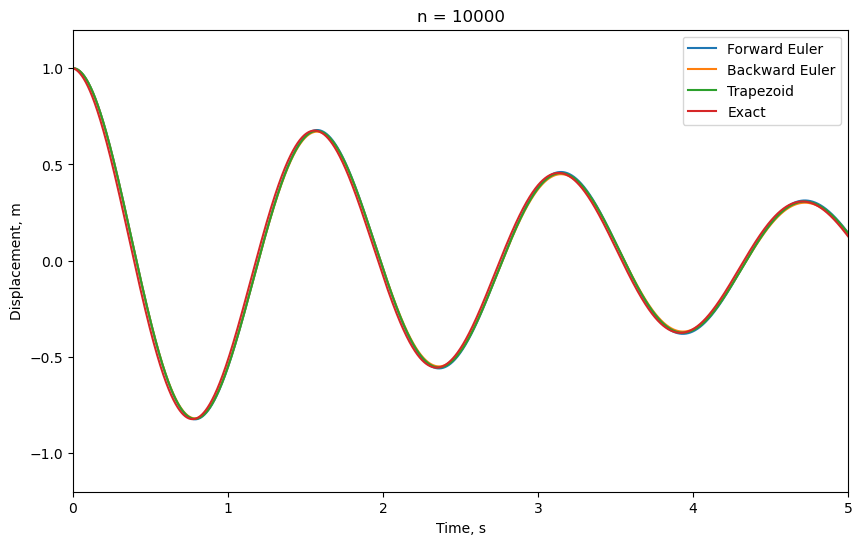

In [545]:
# TEST YOUR FUNCTION HERE
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
t_span = [0,5] # SOLUTION NO PROMPT
n = 10000 # SOLUTION NO PROMPT
q2_4 = my_msd_plot(t_span,n,s0,m,c,k) # SOLUTION

In [ ]:
grader.check("q2.4")

## Question 3: Lorenz System

The Lorenz system is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as

\begin{align}
\dot{x} &= \sigma(y-x) \\
\dot{y} &= x(\rho - z) - y \\
\dot{z} &= xy - \beta z 
\end{align}

where $x$, $y$, and $z$ represent position in three dimensions and $\sigma$, $\rho$, and $\beta$ are scalar parameters of the system. You can read more about the Lorenz system [here](https://en.wikipedia.org/wiki/Lorenz_system).

<img src="resources/lorenz_attractor.png" style="width:400px;"/>
<figcaption style="text-align:center"> Figure 6. A solution in the Lorenz attractor shown in the xz plane </figcaption>   

### Question 3.0

Let $S$ denote the state of the system such that 

$$ S = \begin{bmatrix} x \\ y \\z \end{bmatrix}$$

Write a function `my_lorenz(t,S,sigma,rho,beta)`, where `t` is a scalar denoting time, `S` is a `(3,)` array denoting the state , i.e. the position $(x,y,z)$, and `sigma`, `rho`, and `beta` are strictly positive scalars representing $\sigma$, $\rho$, and $\beta$, respectively. Recall that just like in Question 1, the input argument `t` is obligatory if `my_lorenz` is to be used as an input argument to `solve_ivp`, even though it is not part of the differential equation. Your function should return the time derivative, $\dot{S}$, as an array with the same size as `S`. The equations for $\dot{S}$ are given above.

Once you are done, try out your new `my_lorenz(t,S,sigma,rho,beta)` function for the example below and make sure it produces the correct output. Assign the result to `q3_0`.
 
```PYTHON
Examples: 
    
>>> my_lorenz(0,np.array([1, 2, 3]), 10, 28, 8/3)
array([10., 23., -6.])
```

In [549]:
# ANSWER CELL
# BEGIN SOLUTION
def my_lorenz(t, S, sigma, rho, beta):
    u = sigma*(S[1] - S[0])
    v = S[0]*(rho - S[2]) - S[1]
    w =  S[0]*S[1] - beta*S[2]
    return np.array([u,v,w])
# END SOLUTION

In [550]:
# TEST YOUR FUNCTION HERE
q3_0 = my_lorenz(0,np.array([1, 2, 3]), 10, 28, 8/3) # SOLUTION
q3_0

array([10., 23., -6.])

In [ ]:
grader.check("q3.0")

### Question 3.1: Fourth Order Runge-Kutta Method (RK4)

Write a function `my_lorenz_RK4(t_span,n,s0,sigma,rho,beta)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `s0` is a `numpy.array` of shape `(3,)` denoting the initial state of the Lorenz system
* `sigma`, `rho`, and `beta` are the scalar parameters $\sigma$, $\rho$, and $\beta$, respectively, of the Lorenz system.

Note that in this case, there are three initial conditions, the positions $x, y, z$ at $t_0$:

$$ S_0 = \begin{bmatrix} x_0 \\ {y}_0 \\ {z_0}\end{bmatrix}$$

Your function should solve the Lorenz equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the [fourth order Runge-Kutta method](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.05-Predictor-Corrector-Methods.html#fourth-order-runge-kutta-method):

$$
\begin{eqnarray*}
k_1 & = & F(t_j,S(t_j)) = \begin{bmatrix} \dot{x_j} \\ \dot{y_j} \\\dot{z_j} \end{bmatrix}\\
k_2 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_1h\right) \\
k_3 & = & F\left(t_j+\frac{h}{2},S(t_j)+\frac{1}{2}k_2h\right)\\
k_4 & = & F\left(t_j+h,S(t_j)+k_3h\right)
\end{eqnarray*}
$$

The solution is then computed as:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right).
$$

or in matrix form:

$$ \begin{bmatrix} x_{j+1} \\ {y}_{j+1} \\ {z_{j+1}}\end{bmatrix} = \begin{bmatrix} x_{j} \\ {y}_{j} \\ {z_{j}}\end{bmatrix}+ \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)$$

*Note that in the above equations, $F(t, S(t))$ represents your function `my_lorenz(t,S,sigma,rho,beta)`. So you have to call your function `my_lorenz` four times to compute $k_1, k_2, k_3, k_4$, each time passing different arguments for `S` based on the equations above. In addition, you can always use `t=t0` when calling `my_lorenz` in this case, because as mentioned previously, the function does not depend on the values of `t`.*

Your `my_lorenz_RK4` function should return four `numpy.array` objects in the following order:
* the discrete time grid,
* the numerical solution for $x$ evaluated on the time grid,
* the numerical solution for $y$ evaluated on the time grid,
* the numerical solution for $z$ evaluated on the time grid.

All four arrays should have size `(n+1,)`.

Once you are done, try out your new `my_lorenz_RK4(t_span,n,s0,sigma,rho,beta)` function for the example below and make sure it produces the correct output. Assign the result to `q3_1`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,50]
>>> n = 10000
>>> s0 = np.array([0, 1, 1.05])
>>> sigma = 10
>>> rho = 28
>>> beta = 8/3
>>> my_lorenz_RK4(t_span,n,s0,sigma,rho,beta)

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.9990e+01, 4.9995e+01,
        5.0000e+01]),
 array([0.        , 0.04870245, 0.09510639, ..., 0.48781901, 0.49868598,
        0.51060243]),
 array([1.        , 0.99831774, 1.00303716, ..., 0.69467581, 0.72651049,
        0.75945225]),
 array([ 1.05      ,  1.03621498,  1.02284888, ..., 13.73960145,
        13.55936328, 13.38163371]))
```

In [553]:
# ANSWER CELL
# BEGIN SOLUTION
def my_lorenz_RK4(t_span,n,s0,sigma,rho,beta):
    
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    S = np.zeros((3,n+1))
    S[:,0] = s0
    for i in range(1,n+1):
        k1 = my_lorenz(t0, S[:,i-1], sigma, rho, beta)
        k2 = my_lorenz(t0, S[:,i-1] + (dt/2)*k1, sigma, rho, beta)
        k3 = my_lorenz(t0, S[:,i-1] + (dt/2)*k2, sigma, rho, beta)
        k4 = my_lorenz(t0, S[:,i-1] + dt*k3, sigma, rho, beta)
        S[:,i] =  S[:,i-1] + (dt/6)*(k1+2*k2+2*k3+k4)
        
    return ts,S[0,:],S[1,:],S[2,:]
# END SOLUTION

In [554]:
# TEST YOUR FUNCTION HERE
t_span = [0,50] # SOLUTION NO PROMPT
n = 10000 # SOLUTION NO PROMPT
s0 = np.array([0, 1, 1.05]) # SOLUTION NO PROMPT
sigma = 10 # SOLUTION NO PROMPT
rho = 28 # SOLUTION NO PROMPT
beta = 8/3 # SOLUTION NO PROMPT
q3_1 = my_lorenz_RK4(t_span,n,s0,sigma,rho,beta) # SOLUTION 
q3_1

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.9990e+01, 4.9995e+01,
        5.0000e+01]),
 array([0.        , 0.04870245, 0.09510639, ..., 0.48781901, 0.49868598,
        0.51060243]),
 array([1.        , 0.99831774, 1.00303716, ..., 0.69467581, 0.72651049,
        0.75945225]),
 array([ 1.05      ,  1.03621498,  1.02284888, ..., 13.73960145,
        13.55936328, 13.38163371]))

In [ ]:
grader.check("q3.1")

### Question 3.2 

Write a function `my_lorenz_ivp(t_span,n,s0,sigma,rho,beta)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration,
* `n` is an integer indicating the number of discrete time intervals for the numerical method,
* `s0` is a `numpy.array` of shape `(3,)` denoting the initial state of the Lorenz system
* `sigma`, `rho`, and `beta` are the scalar parameters $\sigma$, $\rho$, and $\beta$, respectively, of the Lorenz system.

Your function should solve the Lorenz equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the built-in `scipy.integrate.solve_ivp` function. 

Your `my_lorenz_ivp` function should return four `numpy.array` objects in the following order:
* the discrete time grid,
* the numerical solution for $x$ evaluated on the time grid,
* the numerical solution for $y$ evaluated on the time grid,
* the numerical solution for $z$ evaluated on the time grid.

All four arrays should have size `(n+1,)`.

Once you are done, try out your new `my_lorenz_ivp(t_span,n,s0,sigma,rho,beta)` function for the example below and make sure it produces the correct output. Assign the result to `q3_2`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,50]
>>> n = 10000
>>> s0 = np.array([0, 1, 1.05])
>>> sigma = 10
>>> rho = 28
>>> beta = 8/3
>>> my_lorenz_ivp(t_span,n,s0,sigma,rho,beta)

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.9990e+01, 4.9995e+01,
        5.0000e+01]),
 array([ 0.        ,  0.04870278,  0.09510677, ..., -6.47711257,
        -5.91836451, -5.37778722]),
 array([1.        , 0.99831735, 1.00303671, ..., 4.87306536, 5.07875421,
        5.24624053]),
 array([ 1.05      ,  1.03621495,  1.02284887, ..., 35.80640543,
        35.17867304, 34.56786129]))
```

In [557]:
# ANSWER CELL
# BEGIN SOLUTION
def my_lorenz_ivp(t_span,n,s0,sigma,rho,beta):
    t0 = t_span[0]
    tf = t_span[1]
    ts = np.linspace(t0,tf,n+1)
    sol = solve_ivp(my_lorenz,t_span,s0,args=(sigma, rho, beta),t_eval=ts)
    return sol.t, sol.y[0,:], sol.y[1,:], sol.y[2,:]
# END SOLUTION

In [558]:
# TEST YOUR FUNCTION HERE
t_span = [0,50] # SOLUTION NO PROMPT
n = 10000 # SOLUTION NO PROMPT
s0 = np.array([0, 1, 1.05]) # SOLUTION NO PROMPT
sigma = 10 # SOLUTION NO PROMPT
rho = 28 # SOLUTION NO PROMPT
beta = 8/3 # SOLUTION NO PROMPT
q3_2 = my_lorenz_ivp(t_span,n,s0,sigma,rho,beta) # SOLUTION 
q3_2

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.9990e+01, 4.9995e+01,
        5.0000e+01]),
 array([ 0.        ,  0.04870278,  0.09510677, ..., -6.47711257,
        -5.91836451, -5.37778722]),
 array([1.        , 0.99831735, 1.00303671, ..., 4.87306536, 5.07875421,
        5.24624053]),
 array([ 1.05      ,  1.03621495,  1.02284887, ..., 35.80640543,
        35.17867304, 34.56786129]))

In [ ]:
grader.check("q3.2")

### Question 3.3: Further Exploration (Optional) 

The popular term *butterfly effect* in chaos theory stems from the solution of a Lorentz system and describes the sensitivity of a system to the choice of initial conditions. A very small change in the initial conditions or the system parameters can result in a large difference in the solution, hence it is a chaotic system. 

Use the cell below which creates a simple plot of the solution as a starting point. In this section, you are free to experiment and explore this phenomena. Adjust and modify the parameters, compare different solutions, try to recreate some of the beautiful images online or anything else you find interesting. Feel free to share any cool results on Ed.


This section will not be graded.

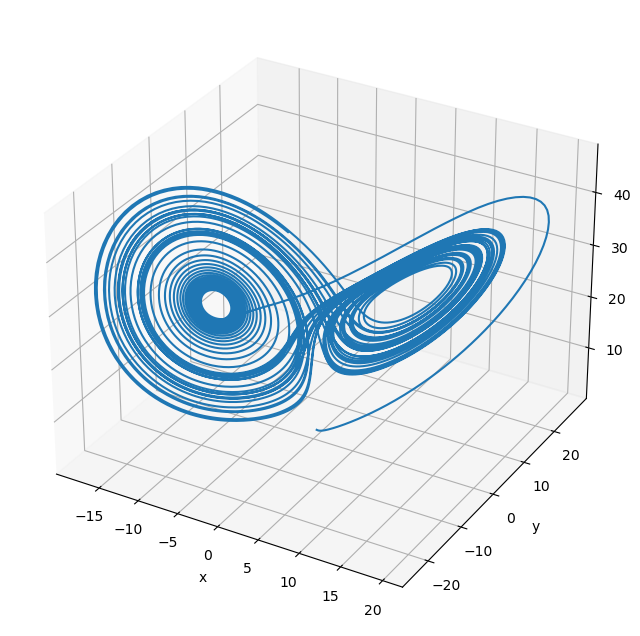

In [561]:
# ANSWER CELL
from mpl_toolkits import mplot3d

t_span = [0,50]
n = 10000 
s0 = np.array([0, 1, 1.05])
sigma = 10 
rho = 28 
beta = 8/3 
t,x,y,z = my_lorenz_ivp(t_span,n,s0,sigma,rho,beta) 

# Create figure
fig = plt.figure(figsize=(8,8))
# 3d axes
ax = plt.axes(projection='3d')
# Plot
ax.plot3D(x,y,z)
# Set axes labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Add grid
ax.grid()
plt.show()

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

In [562]:
import matplotlib.image as mpimg
from IPythonDisplayFireworks import Fireworks
from IPython.display import clear_output
img = mpimg.imread('resources/cover.png')
plt.figure(figsize = (12,6))
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing the E7 Lab series!")
plt.show()
f = Fireworks(15)
time.sleep(15)
clear_output()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)